In [1]:
np.random.randint?

Object `np.random.randint` not found.


In [2]:
# generate random 2D points
import numpy as np

pts1 = np.random.standard_normal((100, 2))
pts2 = np.random.normal(10, 2, (100,2))
pts3 = np.random.normal(5, 2, (100,2))

pts = np.concatenate((pts1, pts2, pts3), axis=0)

More distributions [here](http://docs.scipy.org/doc/numpy/reference/routines.random.html)

In [3]:
pts.shape

(300, 2)

Populating the interactive namespace from numpy and matplotlib


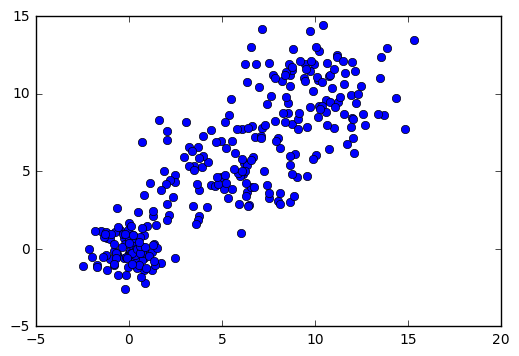

In [4]:
# plot the random points
%pylab inline

plot(pts[:,0],pts[:,1],'bo')

In [5]:
def kmeans(points, k):
    # Initialize centroids randomly
    centroids = points[np.random.randint(low=0, high=points.shape[0], size=k)]
    
    # keeping track of the number of iterations
    iterations = 0
    old_centroids = None
    
    while not converged(old_centroids, centroids):
        old_centroids = centroids
        iterations += 1
        
        
        # Assign labels to each datapoint based on centroids
        labels = get_labels(points, centroids)
        
    # Assign centroids based on datapoint labels
        centroids = get_centroids(points, labels, k)
        
    # We can get the labels too by calling getLabels(dataSet, centroids)
    return centroids

In [6]:
a = [4,3,2,1]
print (min(a))

np.argmin(a) # value[index of min]

1


3

In [7]:
from numpy import linalg as LA

def get_labels(points, centroids):
    labels = []
    for point in points:
        distances = [LA.norm(point - centroid) for centroid in centroids]
        labels.append(np.argmin([distances]))
    return np.array(labels)

#grgmin = the index that minimizes sth

def get_centroids(points, labels, k):
    centroids = []
    for label in range(k):
        centroids.append(np.mean(points[np.where(labels==label)], axis=0))
    return centroids
        
def converged(old_centroids, centroids):
    return np.array_equal(old_centroids, centroids)
# list1 = 

In [8]:
list1 = [1,2,3,4]
a1 = np.array([1,2,3,4])

print (list1==a1)


print (np.array_equal(list1, a1))

[ True  True  True  True]
True


In [9]:
k=6
centroids = kmeans(pts,k)

In [10]:
print (centroids)

[array([  9.9195273 ,  11.84327342]), array([ 7.31117183,  8.42777962]), array([ 6.87109924,  4.32029553]), array([ 3.24421893,  5.01760537]), array([ 11.58515058,   8.55625278]), array([ 0.01877775,  0.02033264])]


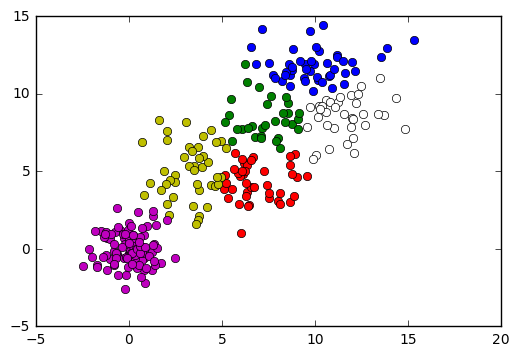

In [11]:
colors = ['b', 'g', 'r', 'y', 'w', 'm', 'k', 'c']

labels = get_labels(pts, centroids)
for i in range(k):
    plot(pts[np.where(labels==i)][:,0],pts[np.where(labels==i)][:,1], '%so' % colors[i])